# 1) Data Preparation/Analysis & understanding of data

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle

In [3]:
train = pd.read_csv("train.csv", nrows=100000)
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
test = pd.read_csv("test.csv")

In [5]:
train.shape, test.shape

((100000, 8), (9914, 7))

In [6]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

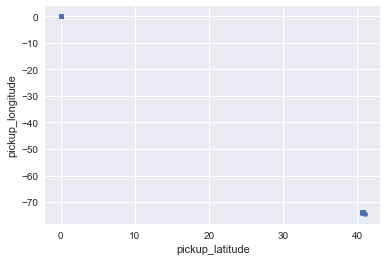

In [7]:
train.iloc[:1000].plot.scatter('pickup_latitude', 'pickup_longitude')

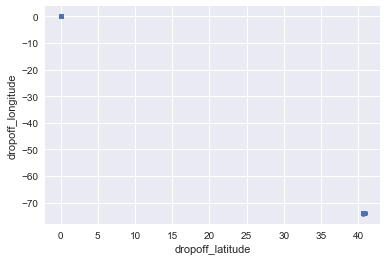

In [8]:
train.iloc[:1000].plot.scatter('dropoff_latitude', 'dropoff_longitude')

In [10]:
train[train.fare_amount<0].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2010-03-09 23:37:10.0000005,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2015-03-22 05:14:27.0000001,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,2013-08-30 08:57:10.0000002,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
28839,2013-08-11 13:39:10.0000001,-2.5,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,2015-04-30 15:19:45.0000003,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1


In [11]:
train[train.passenger_count> 6].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


train = train[(train['pickup_latitude']>=35) & (train['pickup_latitude']<=45) &
      (train['dropoff_latitude']>=35) & (train['dropoff_latitude']<=45) &
      (train['pickup_longitude']>= -80) & (train['pickup_longitude']<= -70) &
      (train['dropoff_longitude']>= -80) & (train['dropoff_longitude']<= -70) &
      (train['passenger_count'] >0) & (train['passenger_count'] <=6) &
      (train['fare_amount'] > 0)]

In [12]:
train[(train.pickup_longitude >= -74.259090) & (train.pickup_longitude <= -73.700272) &
(train.dropoff_longitude >= -74.259090) & (train.dropoff_longitude <= -73.700272) &
(train.pickup_latitude >= 40.477399) & (train.pickup_latitude <= 40.917577) &
(train.dropoff_latitude >= 40.477399) & (train.dropoff_latitude <= 40.917577) &
      (train['passenger_count'] >0) & (train['passenger_count'] <=6) &
      (train['fare_amount'] > 0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [17]:
train[(train.pickup_longitude < -74.259090) | (train.pickup_longitude > -73.700272) |(train.pickup_longitude != 0.000000) |
(train.dropoff_longitude < -74.259090) | (train.dropoff_longitude > -73.700272) |(train.dropoff_longitude != 0.000000) |
(train.pickup_latitude < 40.477399) | (train.pickup_latitude > 40.917577) |(train.pickup_latitude != 0.000000) |
(train.dropoff_latitude < 40.477399) | (train.dropoff_latitude > 40.917577)  | (train.dropoff_latitude != 0.000000) ]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [1]:
train = train[(train.pickup_longitude >= -74.259090) & (train.pickup_longitude <= -73.700272) &
(train.dropoff_longitude >= -74.259090) & (train.dropoff_longitude <= -73.700272) &
(train.pickup_latitude >= 40.477399) & (train.pickup_latitude <= 40.917577) &
(train.dropoff_latitude >= 40.477399) & (train.dropoff_latitude <= 40.917577) &
      (train['passenger_count'] >0) & (train['passenger_count'] <=6) &
      (train['fare_amount'] > 0)]

NameError: name 'train' is not defined

In [11]:
len(train)

974352

In [18]:
from math import sin, cos, sqrt, atan2, radians
import numpy as np
# approximate radius of earth in km
R = 6373.0

lat1 = radians(52.2296756)
lon1 = radians(21.0122287)
lat2 = radians(52.406374)
lon2 = radians(16.9251681)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result:", distance)

Result: 278.54558935106695


In [19]:
def earth_dist(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    R = 6373.0
    pickup_lat, pickup_long, dropoff_lat, dropoff_long = map(np.radians, [pickup_lat, pickup_long, dropoff_lat, dropoff_long])
    dlat = dropoff_lat - pickup_lat
    dlon = dropoff_long - pickup_long
    
    
    a = np.sin(dlat / 2)**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return(distance)

In [20]:
train['earth_distance'] = earth_dist(train['pickup_latitude'].tolist(), train['pickup_longitude'].tolist(), train['dropoff_latitude'].tolist(), train['dropoff_longitude'].tolist())

In [21]:
test['earth_distance'] = earth_dist(test['pickup_latitude'].tolist(), test['pickup_longitude'].tolist(), test['dropoff_latitude'].tolist(), test['dropoff_longitude'].tolist())

In [22]:
def add_date_details(df):
    df['key'] = pd.to_datetime(df['key'])
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['pyear'] = df['pickup_datetime'].dt.year
    df['pmonth'] = df['pickup_datetime'].dt.month
    df['phour'] = df['pickup_datetime'].dt.hour
    df['pday'] = df['pickup_datetime'].dt.day
    df['pweekday'] = df['pickup_datetime'].dt.weekday
    return(df)

In [23]:
train = add_date_details(train)

In [24]:
test = add_date_details(test)

In [25]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.031088,2009,6,17,15,0
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.452786,2010,1,16,5,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389961,2011,8,0,18,3
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.800149,2012,4,4,21,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999784,2010,3,7,9,1


In [ ]:
fare_amount >= 2.5 and pickup_longitude > -78 and pickup_longitude < -70 \
      and dropoff_longitude > -78 and dropoff_longitude < -70 and pickup_latitude > 37 \
      and pickup_latitude < 45 and dropoff_latitude > 37 and dropoff_latitude < 45 \
      and passenger_count > 0
    
    

In [98]:
train[(train.pickup_longitude <= -78) & (train.pickup_longitude >= -70) | (train.pickup_longitude == 0) ]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.0,0.0,0.000000,0.000000,3,0.000000,2012,12,11,24,0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.0,0.0,0.000000,0.000000,1,0.000000,2013,11,12,23,5
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.0,0.0,0.000000,0.000000,1,0.000000,2011,2,20,7,0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.0,0.0,0.000000,0.000000,2,0.000000,2013,1,17,17,3
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.0,0.0,0.000000,0.000000,5,0.000000,2010,9,17,5,6
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.0,0.0,0.000000,0.000000,2,0.000000,2011,7,1,24,6
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.0,0.0,0.000000,0.000000,4,0.000000,2009,10,18,30,4
357,2013-07-04 16:41:27.000000200,8.50,2013-07-04 16:41:27,0.0,0.0,0.000000,0.000000,1,0.000000,2013,7,16,4,3
376,2014-05-29 05:57:22.000000100,2.50,2014-05-29 05:57:22,0.0,0.0,0.000000,0.000000,1,0.000000,2014,5,5,29,3
387,2012-11-15 08:39:00.000000950,13.00,2012-11-15 08:39:00,0.0,0.0,0.000000,0.000000,1,0.000000,2012,11,8,15,3


In [100]:
train[((train.pickup_longitude <= -78) & (train.pickup_longitude >= -70) | (train.pickup_longitude == 0)) |
((train.dropoff_longitude <= -78) & (train.dropoff_longitude >= -70) | (train.dropoff_longitude == 0)) |
((train.pickup_latitude <= 37) & (train.pickup_latitude >= 45) | (train.pickup_latitude == 0)) |
((train.dropoff_latitude <= 37) & (train.dropoff_latitude >= 45) | (train.dropoff_latitude == 0)) ]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3,0.000000,2012,12,11,24,0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1,0.000000,2013,11,12,23,5
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1,0.000000,2011,2,20,7,0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2,0.000000,2013,1,17,17,3
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5,0.000000,2010,9,17,5,6
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2,0.000000,2011,7,1,24,6
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4,0.000000,2009,10,18,30,4
357,2013-07-04 16:41:27.000000200,8.50,2013-07-04 16:41:27,0.000000,0.000000,0.000000,0.000000,1,0.000000,2013,7,16,4,3
376,2014-05-29 05:57:22.000000100,2.50,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1,0.000000,2014,5,5,29,3
387,2012-11-15 08:39:00.000000950,13.00,2012-11-15 08:39:00,0.000000,0.000000,0.000000,0.000000,1,0.000000,2012,11,8,15,3


In [68]:
 train[((train.pickup_longitude <= -78) | (train.pickup_longitude >= -70) | (train.pickup_longitude == 0.000000) )|
((train.dropoff_longitude <= -78) | (train.dropoff_longitude >= -70) | (train.dropoff_longitude == 0.000000) )|
((train.pickup_latitude <= 37) | (train.pickup_latitude >= 45) | (train.pickup_latitude == 0.000000))|
((train.dropoff_latitude <= 37) | (train.dropoff_latitude >= 45) | (train.dropoff_latitude == 0.000000)) |
      train.earth_distance >= 100]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday


In [103]:
train[(train.earth_distance >50) & (train.earth_distance <100 )]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday
1684,2009-05-02 19:01:01.000000200,2.50,2009-05-02 19:01:01,-73.137393,41.366138,-73.996510,40.745320,2,99.802900,2009,5,19,2,5
3075,2009-01-06 10:53:36.000000400,6.90,2009-01-06 10:53:36,-73.137393,41.366138,-73.974598,40.751311,1,98.015848,2009,1,10,6,1
4487,2009-08-26 07:43:16.000000100,4.90,2009-08-26 07:43:16,-73.137393,41.366138,-73.957685,40.765644,1,95.882126,2009,8,7,26,2
7401,2009-07-16 09:41:26.000000100,4.50,2009-07-16 09:41:26,-73.900571,40.764047,-73.137393,41.366138,1,92.634919,2009,7,9,16,3
9808,2009-08-13 23:15:28.000000300,6.90,2009-08-13 23:15:28,-73.137393,41.366138,-73.952331,40.786380,1,93.955084,2009,8,23,13,3
9899,2009-08-12 19:04:53.000000500,7.70,2009-08-12 19:04:53,-73.974361,40.755168,-73.137393,41.366138,1,97.701251,2009,8,19,12,2
17081,2009-08-21 13:51:57.000000200,33.47,2009-08-21 13:51:57,-73.137393,41.366138,-73.865796,40.770828,2,90.086642,2009,8,13,21,4
22804,2009-07-10 11:57:05.000000100,35.05,2009-07-10 11:57:05,-73.137393,41.366138,-73.871245,40.774182,2,90.123107,2009,7,11,10,4
25818,2012-06-02 09:06:00.000000820,6.90,2012-06-02 09:06:00,-74.700000,40.706250,-74.014482,40.714747,3,57.806251,2012,6,9,2,5
28274,2010-01-19 18:34:00.000000830,6.50,2010-01-19 18:34:00,-74.198030,43.098708,-73.266628,43.415190,1,83.257722,2010,1,18,19,1


In [43]:
 train[(train.pickup_longitude <= -78) | (train.pickup_longitude >= -70) |
(train.dropoff_longitude <= -78) | (train.dropoff_longitude >= -70) |
(train.pickup_latitude <= 37) | (train.pickup_latitude >= 45) |
(train.dropoff_latitude <= 37) | (train.dropoff_latitude >= 45)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday


In [107]:
train[(train.pickup_longitude > -78) & (train.pickup_longitude < -70) &
(train.dropoff_longitude > -78) & (train.dropoff_longitude < -70) &
(train.pickup_latitude > 37) & (train.pickup_latitude < 45) &
(train.dropoff_latitude > 37) & (train.dropoff_latitude < 45)  & (train.earth_distance > 100)]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday
5663,2009-02-25 07:05:05.000000300,49.15,2009-02-25 07:05:05,-73.137393,41.366138,-74.000940,40.731723,1,101.126355,2009,2,7,25,2
10710,2011-02-11 21:46:09.000000100,3.70,2011-02-11 21:46:09,-73.955411,39.604164,-73.955647,40.772837,1,129.991277,2011,2,21,11,4
11619,2011-05-27 21:47:44.000000200,11.30,2011-05-27 21:47:44,-73.945106,39.603178,-73.976636,40.749643,1,127.549289,2011,5,21,27,4
12228,2011-04-26 23:18:56.000000200,16.50,2011-04-26 23:18:56,-73.993360,40.721749,-73.977370,39.610604,2,123.599945,2011,4,23,26,1
14536,2011-04-03 12:16:46.000000400,4.10,2011-04-03 12:16:46,-73.982155,40.775187,-73.976399,39.610030,1,129.601127,2011,4,12,3,6
29007,2009-03-24 11:49:20.000000100,50.00,2009-03-24 11:49:20,-73.137393,41.366138,-74.011292,40.702179,1,104.067624,2009,3,11,24,1
29654,2011-02-10 02:22:52.000000100,7.70,2011-02-10 02:22:52,-73.964531,39.631717,-73.982297,40.775564,1,127.238785,2011,2,2,10,3
30950,2011-04-25 08:57:38.000000500,8.50,2011-04-25 08:57:38,-73.954724,39.613492,-73.954297,40.767204,1,128.327233,2011,4,8,25,0
37038,2011-03-10 16:05:27.000000100,8.10,2011-03-10 16:05:27,-73.949891,39.620362,-73.954676,40.770738,1,127.956755,2011,3,16,10,3
44777,2011-03-28 12:08:51.000000200,7.70,2011-03-28 12:08:51,-73.978483,39.607752,-73.980734,40.751096,1,127.174110,2011,3,12,28,0


In [112]:
train[(train.pickup_longitude >= -74.259090) & (train.pickup_longitude <= -73.700272) &
(train.dropoff_longitude >= -74.259090) & (train.dropoff_longitude <= -73.700272) &
(train.pickup_latitude >= 40.477399) & (train.pickup_latitude <= 40.917577) &
(train.dropoff_latitude >= 40.477399) & (train.dropoff_latitude <= 40.917577)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday
0,2009-06-15 17:26:21.000000100,4.50,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.031088,2009,6,17,15,0
1,2010-01-05 16:52:16.000000200,16.90,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.452786,2010,1,16,5,1
2,2011-08-18 00:35:00.000000490,5.70,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389961,2011,8,0,18,3
3,2012-04-21 04:30:42.000000100,7.70,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.800149,2012,4,4,21,5
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999784,2010,3,7,9,1
5,2011-01-06 09:50:45.000000200,12.10,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.788428,2011,1,9,6,3
6,2012-11-20 20:35:00.000000100,7.50,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.556295,2012,11,20,20,1
7,2012-01-04 17:22:00.000000810,16.50,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.156749,2012,1,17,4,2
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.253625,2012,12,13,3,0
9,2009-09-02 01:11:00.000000830,8.90,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.850521,2009,9,1,2,2


In [26]:
train[(train.pickup_longitude < -74.259090) | (train.pickup_longitude > -73.700272) |
(train.dropoff_longitude < -74.259090) | (train.dropoff_longitude > -73.700272) |
(train.pickup_latitude < 40.477399) | (train.pickup_latitude > 40.917577) |
(train.dropoff_latitude < 40.477399) | (train.dropoff_latitude > 40.917577)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3,0.000000,2012,12,11,24,0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1,0.000000,2013,11,12,23,5
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1,0.000000,2011,2,20,7,0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2,0.000000,2013,1,17,17,3
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5,0.000000,2010,9,17,5,6
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2,0.000000,2011,7,1,24,6
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4,0.000000,2009,10,18,30,4
357,2013-07-04 16:41:27.000000200,8.50,2013-07-04 16:41:27,0.000000,0.000000,0.000000,0.000000,1,0.000000,2013,7,16,4,3
376,2014-05-29 05:57:22.000000100,2.50,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1,0.000000,2014,5,5,29,3
387,2012-11-15 08:39:00.000000950,13.00,2012-11-15 08:39:00,0.000000,0.000000,0.000000,0.000000,1,0.000000,2012,11,8,15,3


In [27]:
train[train.earth_distance > 20]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday
147,2014-05-13 22:19:00.000000144,52.50,2014-05-13 22:19:00,-73.982265,40.762062,-73.768550,40.675135,1,20.447423,2014,5,22,13,1
232,2010-05-24 14:24:00.000000210,49.57,2010-05-24 14:24:00,-73.982483,40.756740,-73.789985,40.646910,1,20.315734,2010,5,14,24,0
286,2013-06-14 17:37:00.000000370,57.33,2013-06-14 17:37:00,-73.781127,40.645007,-73.981802,40.762515,1,21.381498,2013,6,17,14,4
437,2014-05-12 23:31:00.000000420,57.33,2014-05-12 23:31:00,-73.790250,40.643705,-74.002270,40.734542,1,20.539004,2014,5,23,12,0
443,2011-11-15 13:07:50.000000600,49.80,2011-11-15 13:07:50,-73.983851,40.761851,-73.783129,40.643785,3,21.422815,2011,11,13,15,1
449,2012-12-21 13:10:00.000000640,56.80,2012-12-21 13:10:00,-73.978817,40.761517,-73.789255,40.642677,1,20.742253,2012,12,13,21,4
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,8670.025830,2009,2,22,22,6
538,2011-04-18 11:58:00.000000100,49.80,2011-04-18 11:58:00,-73.972822,40.793295,-73.782862,40.643950,2,23.073868,2011,4,11,18,0
552,2012-10-17 05:35:00.000000230,52.00,2012-10-17 05:35:00,-73.789985,40.646382,-74.034970,40.611455,1,21.042639,2012,10,5,17,2
582,2012-02-17 08:14:00.000000194,49.80,2012-02-17 08:14:00,-73.788127,40.647295,-73.978957,40.756305,5,20.148513,2012,2,8,17,4


In [25]:
tr_bkp = train.copy()

In [26]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
earth_distance       0
pyear                0
pmonth               0
phour                0
pday                 0
pweekday             0
dtype: int64

In [27]:
train.shape, tr_bkp.shape

((974352, 14), (974352, 14))

In [28]:
import plotly.plotly as py
import plotly.graph_objs as go

taxi_paths = []
for i in range(1000):
    taxi_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ train['pickup_longitude'][i], train['dropoff_longitude'][i] ],
            lat = [ train['pickup_latitude'][i], train['dropoff_latitude'][i] ],
            mode = 'markers',
            line = dict(
                width = 1,
                color = 'red',
            ),
        )
    )
layout = go.Layout(autosize=True,
                   hovermode = 'closest',
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2FuamFtZXMiLCJhIjoiY2pscDhzN2M2MjI4bDNxbjcwcTA5a3NibiJ9.zR1hHZ92gXxIUZGMVbJhnA",
                                bearing=0,
                                pitch=0,
                                zoom=103,
                                
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130)
                                ),
                    width=900,
                    height=600, title = "Pick up Locations in NewYork")

fig = dict(data=taxi_paths, layout=layout)
py.iplot(fig)

In [30]:
plat = train.pickup_latitude[:10000]
dlat = train.dropoff_latitude[:10000]
plon = train.pickup_longitude[:10000]
dlon = train.dropoff_longitude[:10000]

In [31]:
data = [
    go.Scattermapbox(
        lat = plat,
        lon = plon,
        mode='markers',
        marker=dict(
            size=5,
            color='blue',
            opacity=0.7
        ),
    ),
    go.Scattermapbox(
        lat = dlat,
        lon = dlon,
        mode='markers',
        marker=dict(
            size=5,
            color='yellow',
            opacity=0.8        
        )
    )
]

layout = go.Layout(autosize=False,
                    hovermode = 'closest',
                    showlegend = False,
                    width = 900,
                    height = 1200,
                    mapbox = dict(
                        accesstoken="pk.eyJ1Ijoic2FuamFtZXMiLCJhIjoiY2pscDhzN2M2MjI4bDNxbjcwcTA5a3NibiJ9.zR1hHZ92gXxIUZGMVbJhnA",
                        bearing=0,
                        pitch=0,
                        zoom=13,
                        center = dict(
                            lat=40.721319,
                            lon=-73.987130 )
                    ),)
fig = dict(data=data, layout=layout)
py.iplot(fig)

In [33]:
data = [
    go.Scattermapbox(
        lat = plat,
        lon = plon,
        mode='marker',
        marker=dict(
            size=3,
            color='blue',
            opacity=0.7
        ),
    ),
    go.Scattermapbox(
        lat = dlat,
        lon = dlon,
        mode='markers',
        marker=dict(
            size=5,
            color='yellow',
            opacity=0.8        
        )
    )
]

layout = go.Layout(autosize=False,
                    hovermode = 'closest',
                    showlegend = False,
                    width = 900,
                    height = 1200,
                    mapbox = dict(
                        accesstoken="pk.eyJ1Ijoic2FuamFtZXMiLCJhIjoiY2pscDhzN2M2MjI4bDNxbjcwcTA5a3NibiJ9.zR1hHZ92gXxIUZGMVbJhnA",
                        bearing=0,
                        pitch=0,
                        zoom=13,
                        center = dict(
                            lat=40.721319,
                            lon=-73.987130 )
                    ),)
fig = dict(data=data, layout=layout)
py.iplot(fig)

In [34]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'earth_distance', 'pyear', 'pmonth', 'phour', 'pday',
       'pweekday'],
      dtype='object')

In [114]:
train_df = train[['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                  'passenger_count', 'earth_distance', 'pyear', 'pmonth', 'phour', 'pday', 'pweekday']]

In [115]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [116]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,earth_distance,pyear,pmonth,phour,pday,pweekday
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.031088,2009,6,17,15,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.452786,2010,1,16,5,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389961,2011,8,0,18,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.800149,2012,4,4,21,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999784,2010,3,7,9,1


In [38]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
#from sklearn.preprocessing import MinMaxScaler
# separate array into input and output components

features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                  'passenger_count', 'earth_distance', 'pyear', 'pmonth', 'phour', 'pday', 'pweekday']
X = train_df[features]
y = train_df['fare_amount']

#min_max=MinMaxScaler(feature_range=(0,1))

#X = min_max.fit_transform(X)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# shuffle the dataset
X, y = shuffle(X, y, random_state=0)

# split data into train and test sets
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

## Bagging Algorithms to predict fare amount

In [40]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, recall_score, roc_auc_score, roc_curve, mean_squared_error, auc
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve
from sklearn.svm import SVC
from statistics import mode

In [41]:
rfmodel = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rfmodel.fit(X_train, y_train)
rfpred = rfmodel.predict(X_test)

In [42]:
rfmodel.score(X_test, y_test)

0.8432596996828

In [44]:
trainpred = rfmodel.predict(X_train)

In [45]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [46]:
print("RMSE train:", rmse(trainpred, y_train), "RMSE test:", rmse(rfpred, y_test))

RMSE train: 1.4011296721756368 RMSE test: 3.7513940687906615


In [47]:
print("Train Score:", rfmodel.score(X_train, y_train), "Test Score:", rfmodel.score(X_test, y_test))

Train Score: 0.9782001205599 Test Score: 0.8432596996828


In [48]:
kfold = KFold(n_splits=10, random_state=1)
rfresults = cross_val_score(rfmodel, X, y, cv=kfold)
rfresults

KeyboardInterrupt: 

In [49]:
print(rfresults.mean())

NameError: name 'rfresults' is not defined

In [285]:
preds = np.stack([t.predict(X_test) for t in rfmodel.estimators_])
preds[:,0], np.mean(preds[:,0])

(array([ 6.5,  9.3, 10.5,  8.9,  9.3, 15.3, 10.1,  7.3,  8.1, 10.9, 10.9,
         9.3,  8.9,  9.3, 10.1, 10.1,  9.3,  9.3,  7.3,  7.7,  9.5,  9.7,
         9.3,  9.3, 13.3,  8.9,  6.9,  9.7,  9.3,  9.7, 12.9, 10.5,  8.9,
         9.7, 10.1,  9.3, 10.5,  8.5,  3.7,  8.9,  6.5,  8.9,  8.9,  9. ,
         8.9,  8.1,  9.3,  9.7,  8.9, 12.5,  9.3,  6.9,  7.3,  8.9, 10.1,
         9.7,  8.1,  9.7,  9.7,  8.9,  9.7, 16.1,  8.1,  8.9, 10.1, 15.3,
         3.7, 13.3,  9. ,  8.1,  6.5, 15.5, 12.1,  6.9,  7.7,  8.1,  8.9,
         9.7, 10.1, 10.5,  9.3,  9.7,  8.5,  8.9,  6.9,  8.9,  8.9, 10.5,
        13.7,  8.9, 10.1, 10.1, 10.5, 13.3,  9.3,  8.9,  8.1,  9.7,  8.1,
         9.7]), 9.466000000000001)

Variance Score


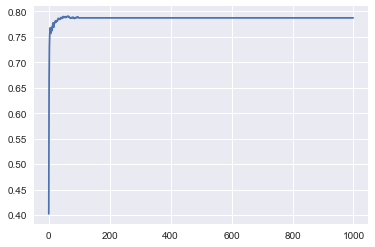

In [289]:
print('Variance Score')
plt.plot([r2_score(y_test, np.mean(preds[:i+1], axis=0))  for i in range(1000)])

In [290]:
r2_score(y_test, rfpred)

0.7873048015560911

The above plot indicates that there is not much difference with increasing the number of trees beyond 200. Ideal value seems to be 100. Lets verify this...

In [291]:
seed = 7
num_trees = 100
max_features = 3
rfkfold = model_selection.KFold(n_splits=10, random_state=1)
rfmodel = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
rfresults = model_selection.cross_val_score(rfmodel, X, y, cv=rfkfold)
print(rfresults.mean())

0.791019716251094


In [292]:
seed = 7
num_trees = 100
max_features = 8
rfkfold = model_selection.KFold(n_splits=10, random_state=1)
rfmodel = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
rfresults = model_selection.cross_val_score(rfmodel, X, y, cv=rfkfold)
print(rfresults.mean())

0.7972224492221148


In [293]:
seed = 7
num_trees = 200
max_features = 8
rfkfold = model_selection.KFold(n_splits=10, random_state=1)
rfmodel = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
rfresults = model_selection.cross_val_score(rfmodel, X, y, cv=rfkfold)
print(rfresults.mean())

0.7978502953087141


In [296]:
seed = 7
num_trees = 300
max_features = 8
rfkfold = model_selection.KFold(n_splits=10, random_state=1)
rfmodel = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
rfresults = model_selection.cross_val_score(rfmodel, X, y, cv=rfkfold)
print(rfresults.mean())

0.7996528403195959


In [297]:
seed = 7
num_trees = 400
max_features = 8
rfkfold = model_selection.KFold(n_splits=10, random_state=1)
rfmodel = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
rfresults = model_selection.cross_val_score(rfmodel, X, y, cv=rfkfold)
print(rfresults.mean())

0.7960079300422968


In [298]:
rfmodel1 = RandomForestRegressor(n_estimators=300, n_jobs=-1)
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)
rfpred1 = rfmodel1.predict(X_test)


0.7873048015560911

In [299]:
r2_score(y_test, rfpred1)

0.7945180553846104

In [302]:
rfmodel = RandomForestRegressor(n_estimators=200, n_jobs=-1, oob_score=True)
rfmodel.fit(X_train, y_train)
rfpred = rfmodel.predict(X_test)
r2_score(y_test, rfpred), rmse(y_test, rfpred)


(0.7931424618018674, 4.253959562352557)

In [303]:
rfmodel.oob_score_

0.7662872417479123

### Reducing Overfitting

    1) grow trees less deeply - with min_samples_leaf. This will result in  less decision rules for each leaf node; simpler models should generalize better. The predictions are made by averaging more rows in the leaf node, resulting in less volatility
    2) increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of columns for each split. This can be done by specifying max_features, which is the proportion of features to randomly select from at each split.

In [304]:
rfmodel = RandomForestRegressor(n_estimators=200, n_jobs=-1, oob_score=True, min_samples_leaf=5)
rfmodel.fit(X_train, y_train)
def print_score(model):
    result = [rmse(model.predict(X_train), y_train), rmse(model.predict(X_test), y_test),
                model.score(X_train, y_train), model.score(X_test, y_test)]
    if hasattr(model, 'oob_score_'): result.append(model.oob_score_)
    print("rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):")
    print(result)
    
print_score(rfmodel)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[3.5576686796510613, 4.003673064781467, 0.8621759741766839, 0.8167677772543602, 0.7620390167425984]


In [307]:
rfmodel = RandomForestRegressor(n_estimators=200, n_jobs=-1, oob_score=True, min_samples_leaf=5, max_features=0.5)
rfmodel.fit(X_train, y_train)
print_score(rfmodel)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[3.610171544119185, 4.008827934932663, 0.8580780374825143, 0.8162956376147555, 0.7630035823776302]


In [309]:
rfmodel = RandomForestRegressor(n_estimators=200, n_jobs=-1, oob_score=True, min_samples_leaf=5, max_features=0.5, 
                                 random_state=seed)
rfmodel.fit(X_train, y_train)
print_score(rfmodel)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[3.5851090601294175, 3.9630359489718066, 0.8600416951535514, 0.8204684993126427, 0.7654392601270528]


In [310]:
rfmodel = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, min_samples_leaf=5, max_features=0.5, 
                                 random_state=seed)
rfmodel.fit(X_train, y_train)
print_score(rfmodel)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[3.577955925065644, 3.9419971367602464, 0.8605996374005785, 0.8223696193821198, 0.7638469440960756]


In [311]:
rfmodel = RandomForestRegressor(n_estimators=75, n_jobs=-1, oob_score=True, min_samples_leaf=5, max_features=0.5, 
                                 random_state=seed)
rfmodel.fit(X_train, y_train)
print_score(rfmodel)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[3.58799789283892, 3.9249120792346748, 0.859816051236741, 0.8239060226465604, 0.7616901537788968]


## XGBoost
XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance.

In [319]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [313]:
xgb_model = xgb.XGBRegressor()

In [314]:
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.8215928324535594

In [315]:
xgb_model_pred = xgb_model.predict(X_test)

In [316]:
print_score(xgb_model)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[3.0763509698399756, 3.9506070138138294, 0.8969458008469102, 0.8215928324535594]


In [317]:
xgbresults = cross_val_score(xgb_model, X, y, cv=kfold)
print(xgbresults.mean())

0.8060321818634109


This is the result without the best parameters. Lets try to optimize the parameters

In [320]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [3, 4, 6],
              'n_estimators': [50, 75, 100, 150, 200]
              }
xgb_clf_cv = GridSearchCV(xgb.XGBRegressor(),param_grid, n_jobs=4, refit=True)

In [321]:
xgb_clf_model_cv = xgb_clf_cv.fit(X_train, y_train)

In [322]:
xgb_clf_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 75}

In [323]:
xgb_clf_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=75,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [324]:
%%time
params_best = {'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.05}
xgb_clf_best = xgb.XGBRegressor(**params_best)
xgb_model_best = xgb_clf_best.fit(X_train, y_train)
xgb_model_pred_best = xgb_clf_best.predict(X_test)

Wall time: 1.02 s


In [325]:
print_score(xgb_clf_best)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[2.8484868569606068, 4.401235339197942, 0.9116467823117645, 0.7785713459372833]


XGBoost with best parameters didnt perform very significantly against XGboost. However, the recall and F1 score significantly improved indicating that the imbalanced data prediction is much better with boosting algorithms.

In [326]:
%%time
params_best = {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05}
xgb_clf_best = xgb.XGBRegressor(**params_best)
xgb_model_best = xgb_clf_best.fit(X_train, y_train)
xgb_model_pred_best = xgb_clf_best.predict(X_test)
print_score(xgb_clf_best)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[2.588661218920148, 4.3584979229145135, 0.9270299967413678, 0.7828507548060039]
Wall time: 1.45 s


In [327]:
%%time
params_best = {'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.05}
xgb_clf_best = xgb.XGBRegressor(**params_best)
xgb_model_best = xgb_clf_best.fit(X_train, y_train)
xgb_model_pred_best = xgb_clf_best.predict(X_test)
print_score(xgb_clf_best)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[2.2095595411436246, 4.3439553290244195, 0.9468375057665331, 0.7842974205998863]
Wall time: 2.15 s


In [328]:
%%time
params_best = {'n_estimators': 175, 'max_depth': 6, 'learning_rate': 0.1}
xgb_clf_best = xgb.XGBRegressor(**params_best)
xgb_model_best = xgb_clf_best.fit(X_train, y_train)
xgb_model_pred_best = xgb_clf_best.predict(X_test)
print_score(xgb_clf_best)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[1.4683732326203804, 4.256535356187875, 0.976521689133162, 0.7928918794081332]
Wall time: 2.55 s


In [330]:
%%time
params_best = {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1}
xgb_clf_best = xgb.XGBRegressor(**params_best)
xgb_model_best = xgb_clf_best.fit(X_train, y_train)
xgb_model_pred_best = xgb_clf_best.predict(X_test)
print_score(xgb_clf_best)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[1.3745072950826258, 4.251979217765152, 0.9794274546234571, 0.7933350136341968]
Wall time: 2.9 s


In [331]:
%%time
params_best = {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1}
xgb_clf_best = xgb.XGBRegressor(**params_best)
xgb_model_best = xgb_clf_best.fit(X_train, y_train)
xgb_model_pred_best = xgb_clf_best.predict(X_test)
print_score(xgb_clf_best)

rmse Train, rmse Test, Accuracy Train, Accuracy Test, OOB(If):
[1.068857494224031, 4.2398537777430505, 0.9875596229382575, 0.7945120329490759]
Wall time: 4.61 s


In [332]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [381]:
test.shape

(9914, 9)

In [378]:
test = pd.read_csv('test.csv')
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [380]:
add_travel_vector_features(test)
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,0.008110,0.019970
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,0.012024,0.019817
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.002870,0.005121
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,0.009288,0.016172
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,0.022519,0.045348


In [382]:
test['pyear'] = test['pickup_datetime'].dt.year
test['pmonth'] = test['pickup_datetime'].dt.month
test['phour'] = test['pickup_datetime'].dt.hour
test['pday'] = test['pickup_datetime'].dt.day
test['pweekday'] = test['pickup_datetime'].dt.weekday
test['pmin'] = test['pickup_datetime'].dt.minute
test['psec'] = test['pickup_datetime'].dt.second

In [355]:
test = test[(test['abs_diff_latitude']<5) & (test['abs_diff_longitude']<5) ]
test = test[(test['pickup_longitude']!= 0) | (test['pickup_latitude']!=0) | (test['dropoff_longitude']!= 0) | (test['dropoff_latitude']!=0)]
test.dropna(how='any', axis='rows', inplace=True)
test.reset_index(drop=True, inplace=True)

In [383]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'abs_diff_longitude', 'abs_diff_latitude', 'pyear', 'pmonth', 'phour',
       'pday', 'pweekday', 'pmin', 'psec'],
      dtype='object')

In [384]:
test_df = test[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'abs_diff_longitude', 'abs_diff_latitude', 'pyear', 'pmonth', 'phour',
       'pday', 'pweekday', 'pmin', 'psec']]

In [385]:
X_pred = test_df.values
min_max=MinMaxScaler(feature_range=(0,1))

X_pred = min_max.fit_transform(X_pred)


In [386]:
xgb_model_pred_test = xgb_clf_best.predict(X_pred)

In [387]:
xgb_model_pred_test

array([ 8.897729,  8.830322, 38.712418, ..., 45.626747, 22.74529 ,
       10.273158], dtype=float32)

In [388]:
submission = pd.DataFrame({
        "key": test.key,
        "fare_amount": xgb_model_pred_test.round(2)
})


In [375]:
submission

,key,fare_amount
0,2015-01-27 13:08:24.000000200,8.900000
1,2015-01-27 13:08:24.000000300,8.830000
2,2011-10-08 11:53:44.000000200,38.709999
3,2012-12-01 21:12:12.000000200,43.040001
4,2012-12-01 21:12:12.000000300,16.320000
5,2012-12-01 21:12:12.000000500,34.639999
6,2011-10-06 12:10:20.000000100,43.310001
7,2011-10-06 12:10:20.000000300,39.919998
8,2011-10-06 12:10:20.000000200,19.520000
9,2014-02-18 15:22:20.000000200,10.690000


In [389]:
submission.to_csv('taxi_fare_submission.csv',index=False)